<a href="https://colab.research.google.com/github/HammadArshd/calculusWithPython/blob/practice/practice/functions/discontinuities_cc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [62]:
# Exercise 1: Jump discontinuity in numpy
xx = np.arange(-1, 2)
# default skip value is 1
xx

array([-1,  0,  1])

In [63]:
resolution = .1
xx = np.arange(-1, 2, resolution)
xx

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00])

In [64]:
# list of function pieces

# acrosss all values of xx
y = [0] * 3
y[0] = np.sin(xx * np.pi)
y[1] = 1.5 * np.ones(len(xx))
y[2] = -(xx - 2)**2
y

[array([-1.22464680e-16, -3.09016994e-01, -5.87785252e-01, -8.09016994e-01,
        -9.51056516e-01, -1.00000000e+00, -9.51056516e-01, -8.09016994e-01,
        -5.87785252e-01, -3.09016994e-01, -6.97573700e-16,  3.09016994e-01,
         5.87785252e-01,  8.09016994e-01,  9.51056516e-01,  1.00000000e+00,
         9.51056516e-01,  8.09016994e-01,  5.87785252e-01,  3.09016994e-01,
         1.45473231e-15, -3.09016994e-01, -5.87785252e-01, -8.09016994e-01,
        -9.51056516e-01, -1.00000000e+00, -9.51056516e-01, -8.09016994e-01,
        -5.87785252e-01, -3.09016994e-01]),
 array([1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5]),
 array([-9.  , -8.41, -7.84, -7.29, -6.76, -6.25, -5.76, -5.29, -4.84,
        -4.41, -4.  , -3.61, -3.24, -2.89, -2.56, -2.25, -1.96, -1.69,
        -1.44, -1.21, -1.  , -0.81, -0.64, -0.49, -0.36, -0.25, -0.16,
        -0.09, -0.04, -0.01])]

In [65]:
# list domains
x_domains = [0] * 3
x_domains[0] = xx < 0
x_domains[1] = np.abs(xx) < resolution/2
x_domains[2] = xx > 0
x_domains

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True])]

In [66]:
# use absolute value to overcome precision problem
# one point that is as closet as possible to 0 smaller than our grid spacing 
# i.e. smaller than our resolution
np.abs(xx) < resolution/2

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

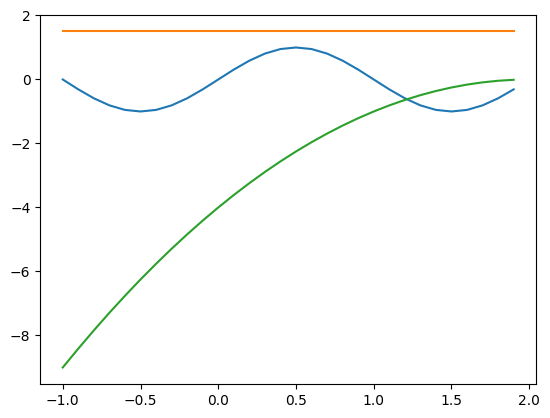

In [67]:
for i in range(len(y)):
  plt.plot(xx, y[i])

plt.show()

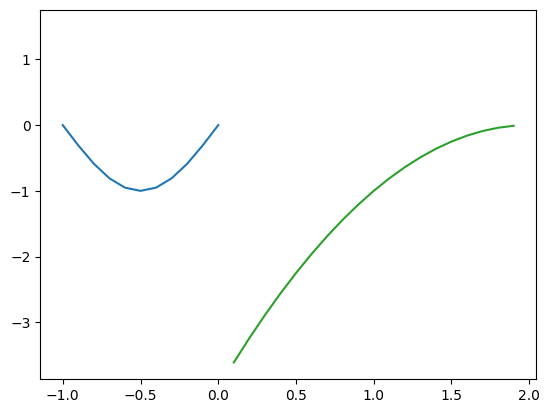

In [68]:
for i in range(len(y)):
  plt.plot(xx[x_domains[i]], y[i][x_domains[i]])

plt.show()

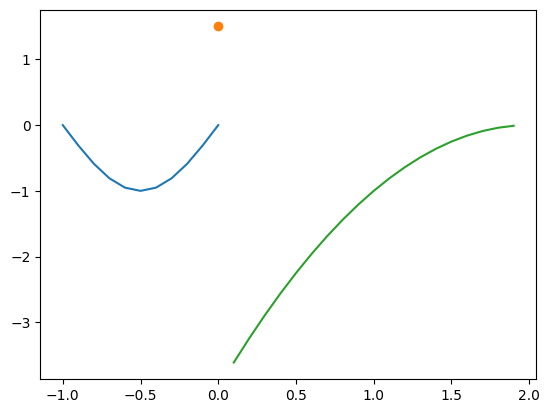

In [69]:
marker = '-o-'
for i in range(len(y)):
  plt.plot(
      xx[x_domains[i]],
      y[i][x_domains[i]],
      marker[i]
  )

plt.show()

In [70]:
# Exercise 2: Jump discontinuity in sympy
from sympy.abc import x

fx = sym.Piecewise(
    (sym.sin(x * sym.pi), x < 0),
    (1.5, sym.Eq(x, 0)),
    (-(x-2)**2, x > 0)
)
fx

Piecewise((sin(pi*x), x < 0), (1.5, Eq(x, 0)), (-(x - 2)**2, x > 0))

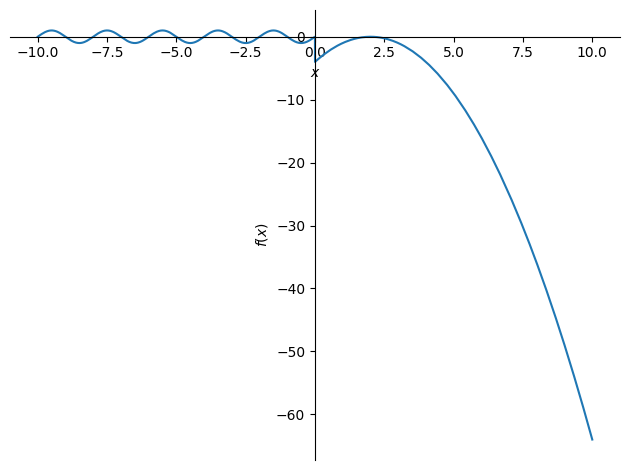

In [71]:
sym.plot(fx)

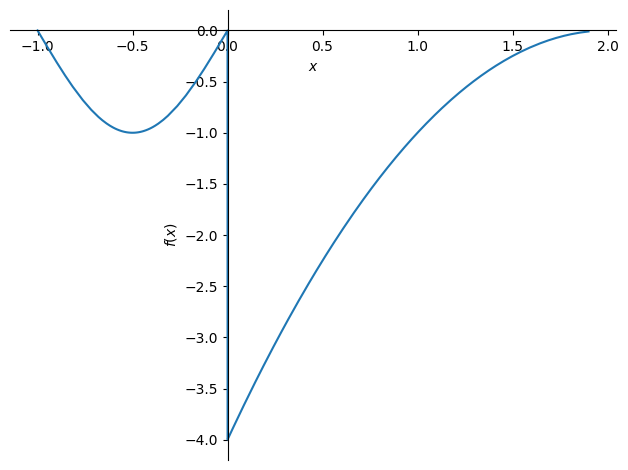

In [72]:
# domain correction
sym.plot(fx, (x, xx[0], xx[-1]))

In [73]:
x

x

In [74]:
fx

Piecewise((sin(pi*x), x < 0), (1.5, Eq(x, 0)), (-(x - 2)**2, x > 0))

In [75]:
fx.subs(x, 0)

1.50000000000000

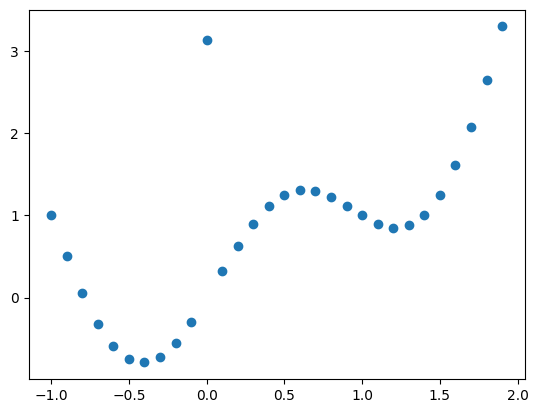

In [76]:
# Exercise 3: removeable discontinuity
y = np.sin(xx*np.pi) + xx**2

# (xx - 0) centring x-axis variable to the numerical value we are looking for
# take the absolute value, then we are looking for the minimum of shifted function above
# and then aregmin returns the index, at which that minimum occurs
# we can omit 0, but keeping for elaboration of general form of technique
y[np.argmin(np.abs(xx - 0))] = np.pi
plt.plot(xx, y, 'o')